In [65]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [66]:
import sympy
from sympy import init_printing

In [67]:
rhoo = sympy.symbols('rhoo')
rhoo

rhoo

In [68]:
Vmax = 80
L = 11
rho_max = 250
nx = 51
dt = 0.001
dx = 0.22 #dao di dx shi duoshao yihou zaishuo
x = numpy.linspace(0, L, nx)

In [69]:
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50


In [70]:
F = Vmax*rhoo*(1-(rhoo/rho_max))
F

80*rhoo*(-rhoo/250 + 1)

In [71]:
Fprime = F.diff(rhoo)
Fprime

-16*rhoo/25 + 80

In [72]:
from sympy.utilities.lambdify import lambdify

In [73]:
FFprime = lambdify((rhoo), Fprime)

In [74]:
Fpie = numpy.asarray([FFprime(xi) for xi in x])
Fpie

array([ 80.    ,  79.8592,  79.7184,  79.5776,  79.4368,  79.296 ,
        79.1552,  79.0144,  78.8736,  78.7328,  78.592 ,  78.4512,
        78.3104,  78.1696,  78.0288,  77.888 ,  77.7472,  77.6064,
        77.4656,  77.3248,  77.184 ,  77.0432,  76.9024,  76.7616,
        76.6208,  76.48  ,  76.3392,  76.1984,  76.0576,  75.9168,
        75.776 ,  75.6352,  75.4944,  75.3536,  75.2128,  75.072 ,
        74.9312,  74.7904,  74.6496,  74.5088,  74.368 ,  74.2272,
        74.0864,  73.9456,  73.8048,  73.664 ,  73.5232,  73.3824,
        73.2416,  73.1008,  72.96  ])

In [75]:
rho = rho0

In [76]:
for i in range (100):
    rhon = rho.copy()
    rho[1:] = rho[1:] - (dt/dx)*Fpie[1:]*(rho[1:]-rho[:-1])
    rho[0] = 10

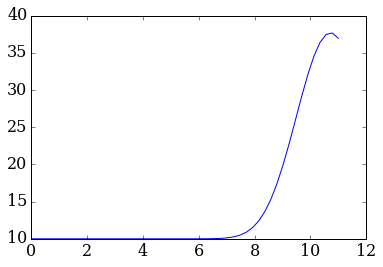

In [77]:
pyplot.plot(x, rho)

In [78]:
max(rho)

37.6615343890643

In [79]:
V = Vmax*(1-(rho/rho_max))
max(V)

76.799999999999997